In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")

In [2]:
Ved = pd.read_csv("Ved.csv", index_col= "Date", parse_dates= ["Date"])

In [3]:
Ved.head(25)

,Price,Returns
Date,,
2014-01-01,202.000000,NaN
2014-01-02,199.850006,-0.010644
2014-01-03,199.149994,-0.003503
2014-01-06,198.949997,-0.001004
2014-01-07,194.500000,-0.022367
2014-01-08,191.500000,-0.015424
2014-01-09,200.350006,0.046214
2014-01-10,196.850006,-0.017469
2014-01-13,195.899994,-0.004826


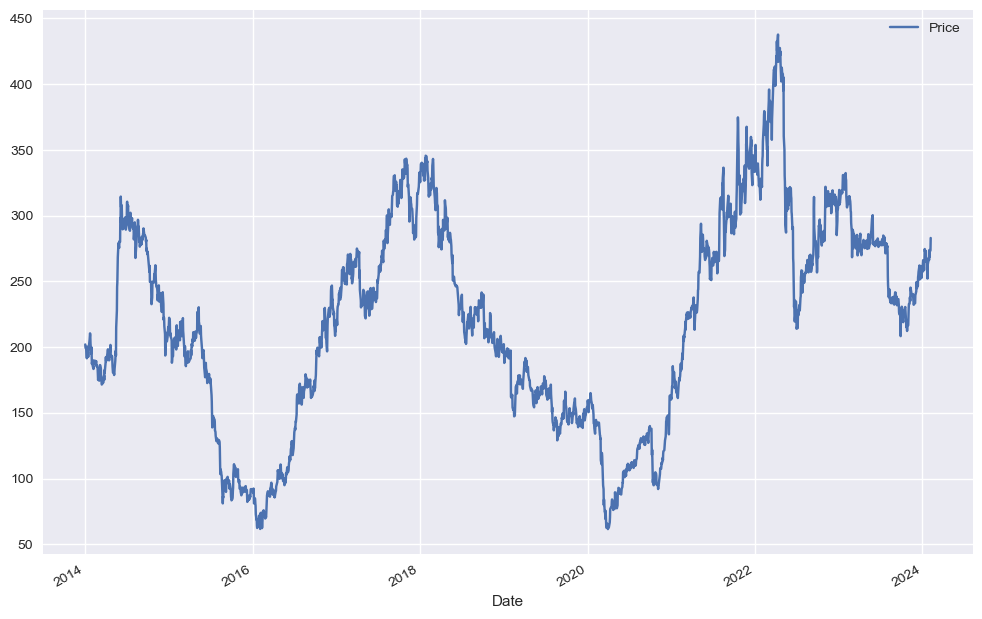

In [4]:
Ved.Price.plot(figsize = (12,8))
plt.legend()
plt.show()

In [7]:
monthly = Ved.Price.resample("M").last() # resample to monthly (month end)
monthly

Date
2014-01-31   188.399994
2014-02-28   177.649994
2014-03-31   188.550003
2014-04-30   185.350006
2014-05-31   280.450012
                ...    
2023-10-31   216.600006
2023-11-30   233.350006
2023-12-31   258.549988
2024-01-31   273.850006
2024-02-29   283.000000
Freq: M, Name: Price, Length: 122, dtype: float64

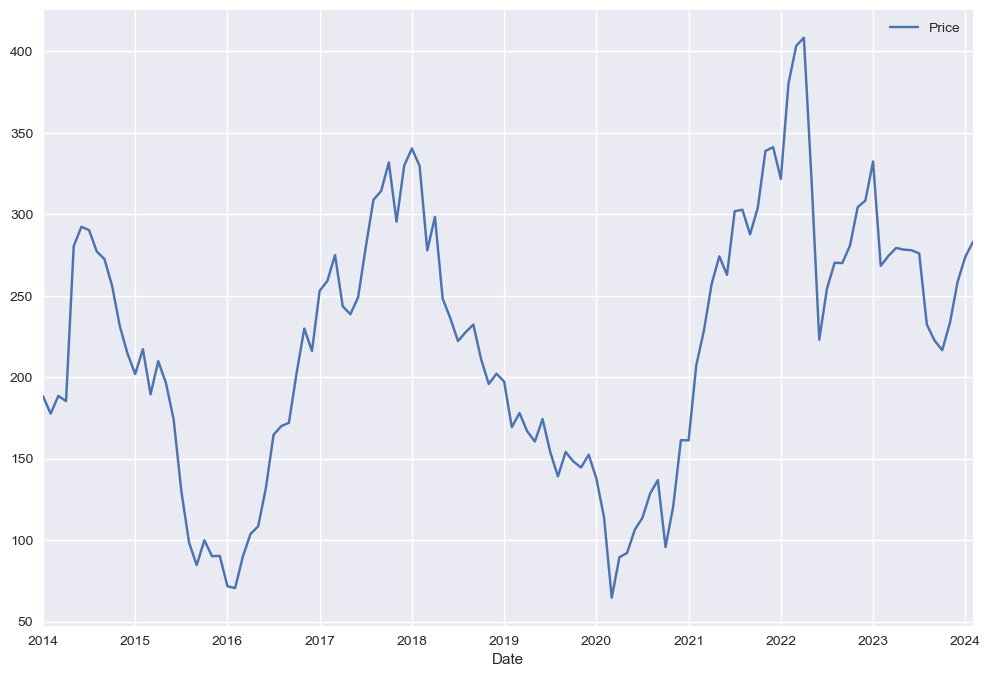

In [8]:
monthly.plot(figsize = (12,8))
plt.legend()
plt.show()

How  will the `Mean-Variance Analysis` change with smoothed data? 

In [9]:
freqs = ["A", "Q", "M", "W-Fri", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [13]:
# resamp = Ved.Price.resample(freqs[1]).last()
# resamp

In [16]:
for i in range(5):
    resamp = Ved.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean()*periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std
    

In [17]:
ann_mean

[0.0277137159275166,
 0.04060836577534681,
 0.04035169268405506,
 0.03467212176565018,
 0.08311778377803522]

In [18]:
ann_std

[0.5385280595669466,
 0.5617322648052228,
 0.47897176231448546,
 0.45267298485605995,
 0.4281863232797732]

In [19]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
A,0.538528,0.027714
Q,0.561732,0.040608
M,0.478972,0.040352
W-Fri,0.452673,0.034672
D,0.428186,0.083118


Text(0.5, 1.0, 'Risk/Return')

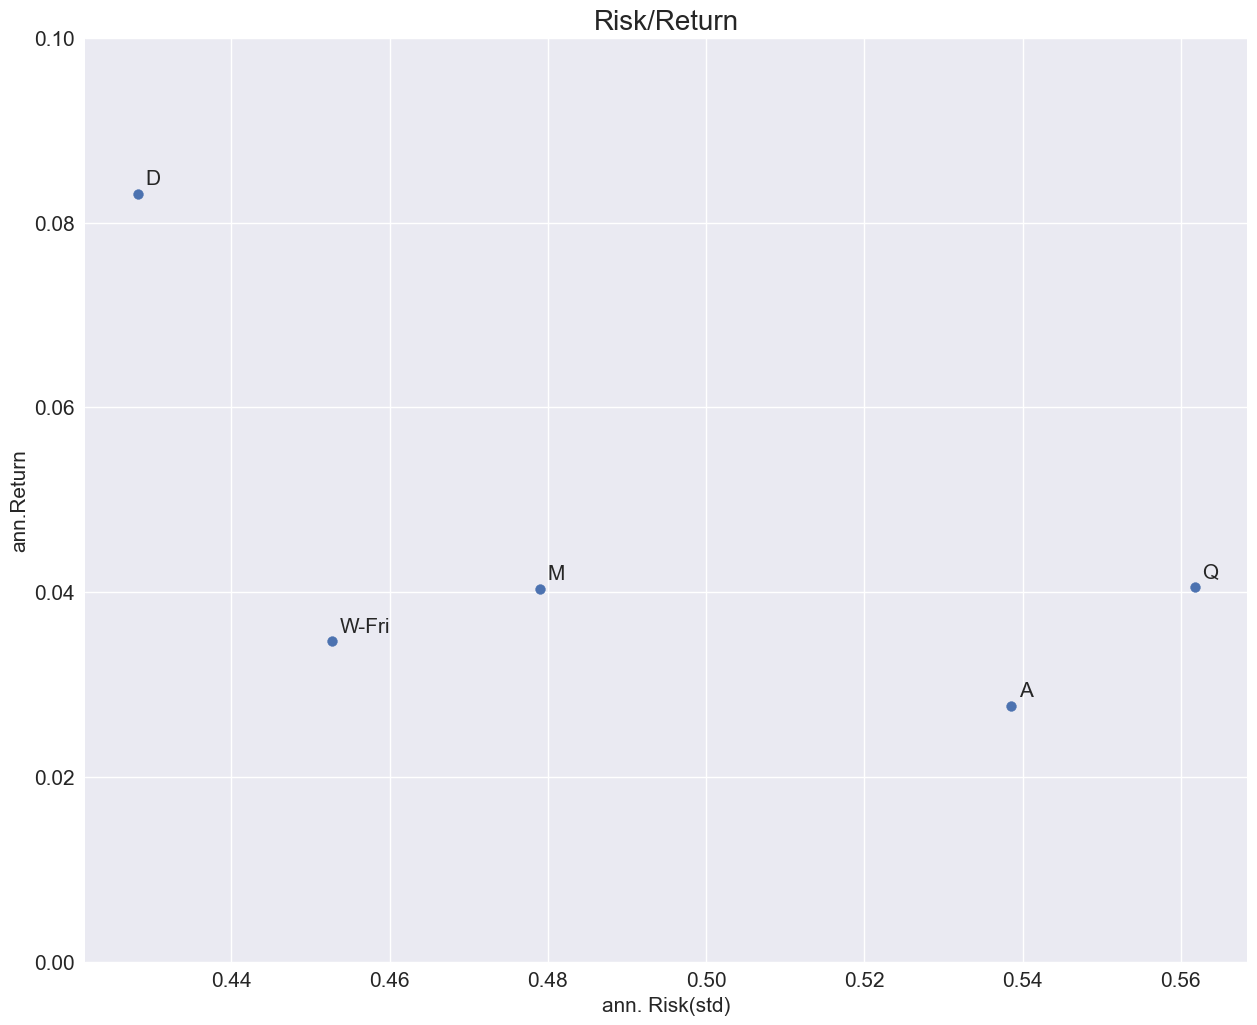

In [22]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
        plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.1)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann.Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)

#### Smoothing reduces (observed) Risk.

Dubious practices:

     .Managing (Manipulating) Performance in performance reportings.

     .Adjusting frequency to investor's (average) holding period ---> Volatility is still there.

    .Comparing assets with different pricing frequency and pricing mechanisms ----->> e.g. real estate with quarterly valuation vs. listed stocks (minutely/hourly/daily prices)

# Take home: when comparing instruments, frequency of underlying data must be the same! Don't compare apples and oranges!